# EDA - Exploratory Data Analysis

Гибель Титаника является одним из самых печально известных кораблекрушений в истории. 15 апреля 1912 года, во время своего первого рейса, Титаник затонул после столкновения с айсбергом, 1502 из 2224 пассажиров и членов экипажа погибли.

Titianic DataSet - это очень хороший набор данных для изучения pandas и разведочного анализа данных.

Целью этого ноутбука является представление о том, как устроен рабочий процесс построения прогнозирующей модели. Как мы проверяем функции, как мы добавляем новые функции, так же некоторые концепции машинного обучения.

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

В пандас принято ипортировать модули как pd. Функция read_csv позволяет читать таблицы из файлов. 

In [4]:
data=pd.read_csv('Titanic.csv')

Для того чтобы увидеть начало таблицы воспользуемся методом head

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.isnull().sum() #проверка пустых значений в данных

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Возраст, каюта и город отплытия в некоторых случаях не заполнены. Я постараюсь исправить это.

## Сколько выжило?

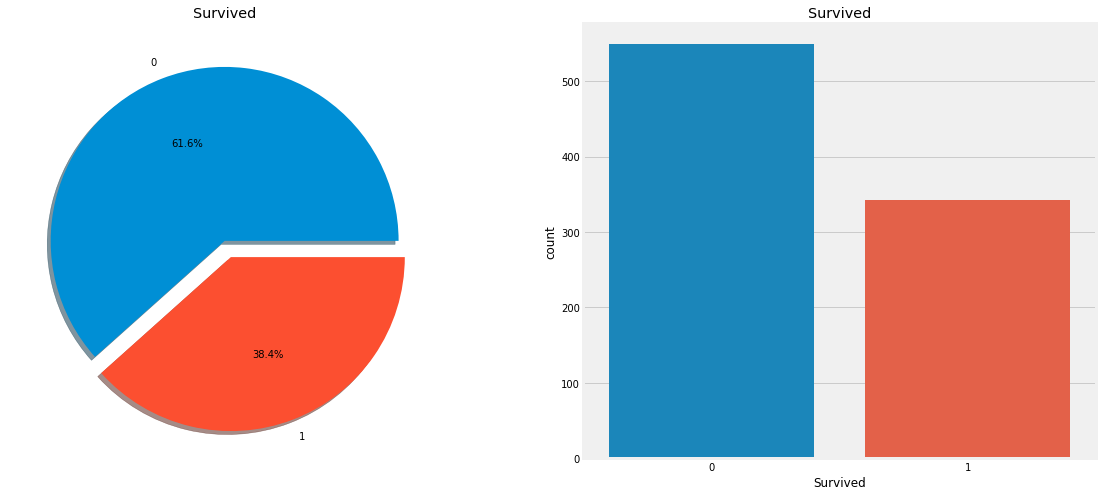

In [19]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

Очевидно, что не так много пассажиров пережило катастрофу.

Из 891 пассажира в train наборе только около 350  выжило. Всего 38,4% от общего количества пассажиров в наборе. Нам нужно больше копаться, чтобы получить лучшее представление о данных и посмотреть, какие категории пассажиров выжили, и кто этого не сделал.

Мы постараемся понять, какие из сведений в данных оказывали влияние на выживаемость пассажиров. 

## Типы признаков

### Категориальные признаки

Категориальный признак - это признак, значения которого обозначают принадлежность объекта к какой-то категории. 
Примеры таких признаков: пол, страна проживания, номер группы, категория товаров и т.п.

Примеры категориальных признаков в нашем наборе данных: имя, пол, номер каюты и город отплытия. 

In [35]:
data[['Embarked']]

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


Очевидно, что компьютер без дополнительного обучения не понимает человечскую речь, что приводит нас к тому, что данные необходимо перекодировать. Для этого мы можем использовать два простых способа. 

#### 1. Label Encoding

Самый простой способ взять готовый из библитеки scikitlearn

In [36]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [37]:
le.fit_transform(data['Embarked'])

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 3, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1,

#### 2. OneHotEncoding или Dummy

Его так же можно импортировать из sklearn, но мы воспользуемся стандартным пандасовским методом get_dummies

In [42]:
pd.get_dummies(data['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


Каждой категории мы создали колонку с ее именем и поставили единицу в тех местах, где значение соответствует строке. 

## Порядковые признаки - ordinal

Аналогичны категориальным признакм, но разница между ними состоит в том, что есть четкое упорядочение категорий. Например, предположим, что у вас есть переменная, экономический статус с тремя категориями (низкий, средний и высокий) или образование (скажем как выпускник начальной школы, выпускник средней школы, какой-либо выпускник колледжа и университета).

Упорядоченные признаки в наборе данных: PClass

## Количественные признаки:

Количественным называется признак, отдельные варианты которого имеют числовое выражение и отражают размеры, масштабы изучаемого объекта или явления.

В наборе данных: возраст

# Анализ признаков

## Пол --> Categorical Feature

In [43]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

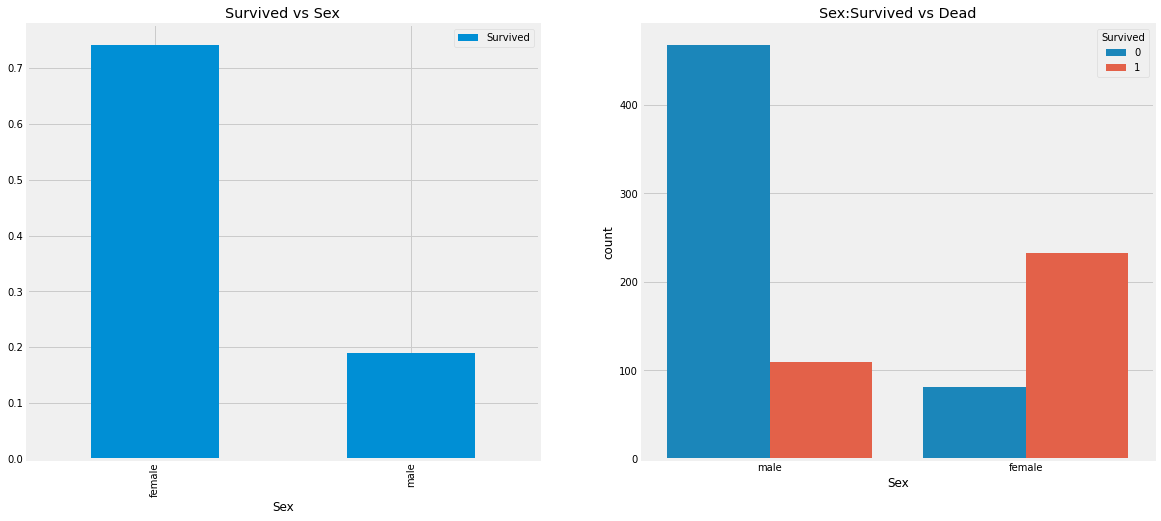

In [52]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

Выглядит интересно. Мужчин на корабле намного больше, чем женщин. Тем не менее, количество спасенных женщин почти вдвое превышает количество спасенных мужчин. **Выживаемость женщин на корабле составляет около 75%, а мужчин - около 18-19%.**

Похоже, это очень важный признак для моделирования. Давайте проверим и другие.

## Pclass --> Ordinal Feature

In [51]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


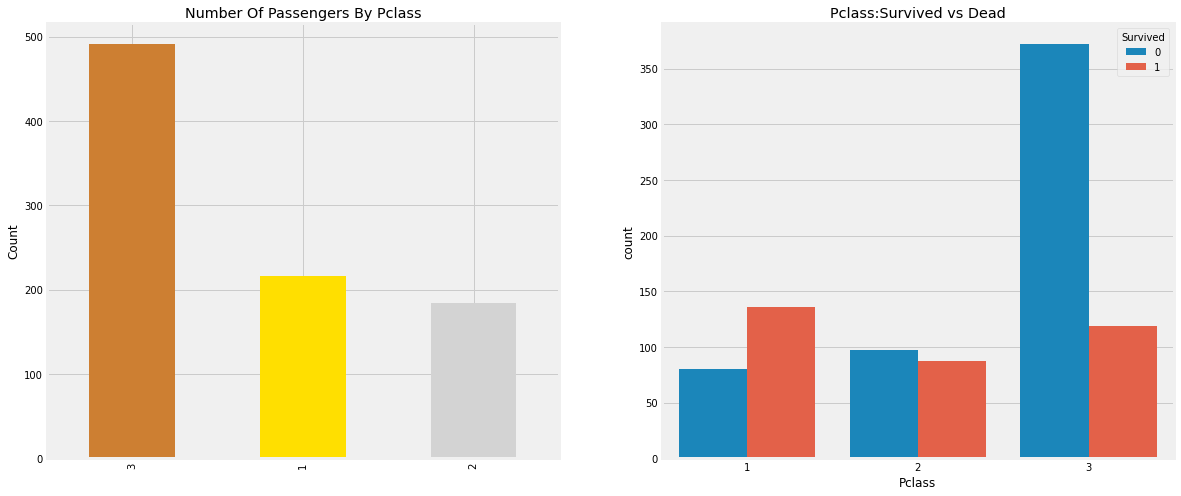

In [53]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

Люди говорят, что за деньги нельзя купить все. Но мы ясно видим, что пассажиры класса 1 получили очень высокий приоритет при спасении. Несмотря на то, что количество пассажиров в классе 3 было намного выше, количество выживших из них очень низкое, где-то около 25%.

Для Pclass = 1  выживших около 63%, а для Pclass = 2 - около 48%. Так что деньги и статус имеют значение. Такой материалистичный мир.

Давайте углубимся еще немного и проверим другие интересные наблюдения. Проверим выживаемость с помощью Sex and Pclass.

In [54]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

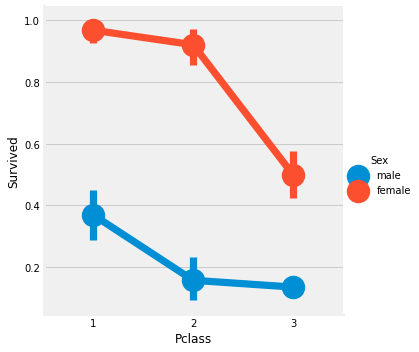

In [55]:
sns.catplot(x="Pclass", y="Survived", hue= "Sex", data=data, kind = "point")
plt.show()

В этом случае мы используем FactorPlot, потому что он упрощает разделение категориальных значений.

Глядя на crosstab и factor plot, мы можем легко сделать вывод, что выживаемость женщин из Pclass1 составляет около 95-96%, так как только 3 из 94 женщин из Pclass1 умерли.

Очевидно, что независимо от Pclass, женщинам уделялось первоочередное внимание при спасении. Даже у мужчин из класса Pclass1 очень низкая выживаемость.

Похоже, Pclass - тоже важная фича. Давайте проанализируем другие особенности.

## Age --> Continous Feature

In [56]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


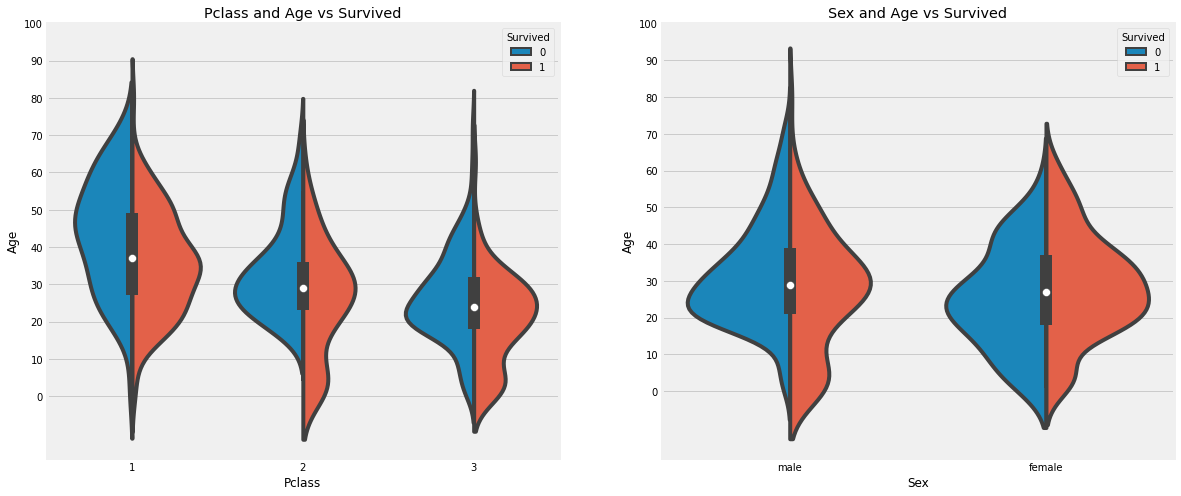

In [57]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x= "Pclass",y="Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

**Наблюдения:**

1) Количество детей увеличивается с Pclass, а выживаемость пассажиров младше 10 лет (то есть детей) выглядит хорошей независимо от Pclass.

2) Шансы на выживание для пассажиров в возрасте 20-50 лет из Pclass1 высоки и в особенности для женщин.

3) У мужчин шансы на выживание с возрастом снижаются.

Как мы видели ранее, признак Age имеет 177 нулевых значений. Чтобы заменить эти значения NaN, мы можем присвоить им средний возраст набора данных.

Но проблема в том, что было много людей разного возраста. Мы просто не можем отнести 4-летнего ребенка к среднему возрасту 29 лет. Есть ли способ узнать, в каком возрасте пассажир??

**Да**, мы можем проверить признак имени. Глядя на эту колонку, мы видим, что у имен есть префикс, например, мистер или миссис. Таким образом, мы можем присвоить средние значения мистера и миссис соответствующим группам.

Это самый продвинутый способ что мы можем здесь применить в отличии от заполнения модой или средним. 

In [58]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #извлечем префиксы

Итак, здесь мы используем регулярное выражение: '([A-Za-z]+)\.'. 
Вот что оно делает: оно ищет строки, которые лежат между A-Z или a-z, за которыми следует ".". 
Теперь, мы успешно извлекли инициалы из имени.

In [60]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #сверим инициалы с полом

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Хорошо, есть несколько инициалов с ошибками, например Mlle или Mme, которые обозначают мисс. Я заменю их на Miss и то же самое для других значений.

In [62]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                         'Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other',
                         'Other','Other','Mr','Mr','Mr'],inplace=True)

In [63]:
data.groupby('Initial')['Age'].mean() #посмотрим средний возраст по инициалам

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

#### Заполним пустые значения возрастов

In [64]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [66]:
data.Age.isnull().any() #проверим правильность выполнения

False

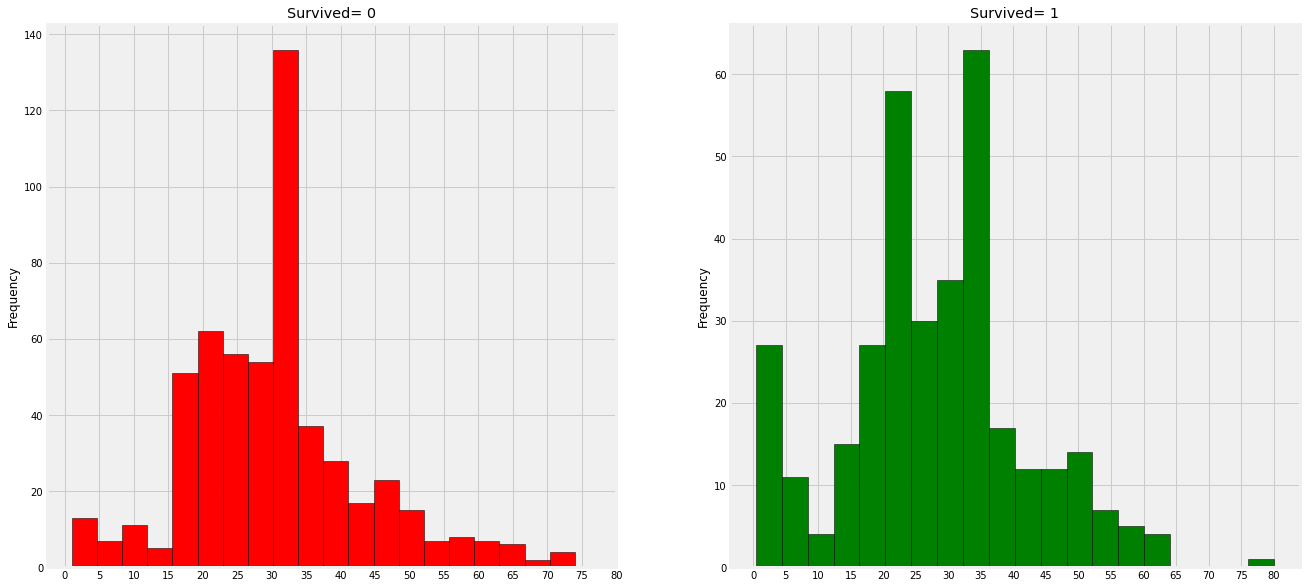

In [67]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

Наблюдения:

1) Дети младшего возраста (возраст <5) были спасены в большом количестве (Политика «Женщины и дети - прежде всего»).

2) Самый старший Пассажир был спасен (80 лет).

3) Максимальное количество умерших приходилось на возрастную группу 30-40 лет.

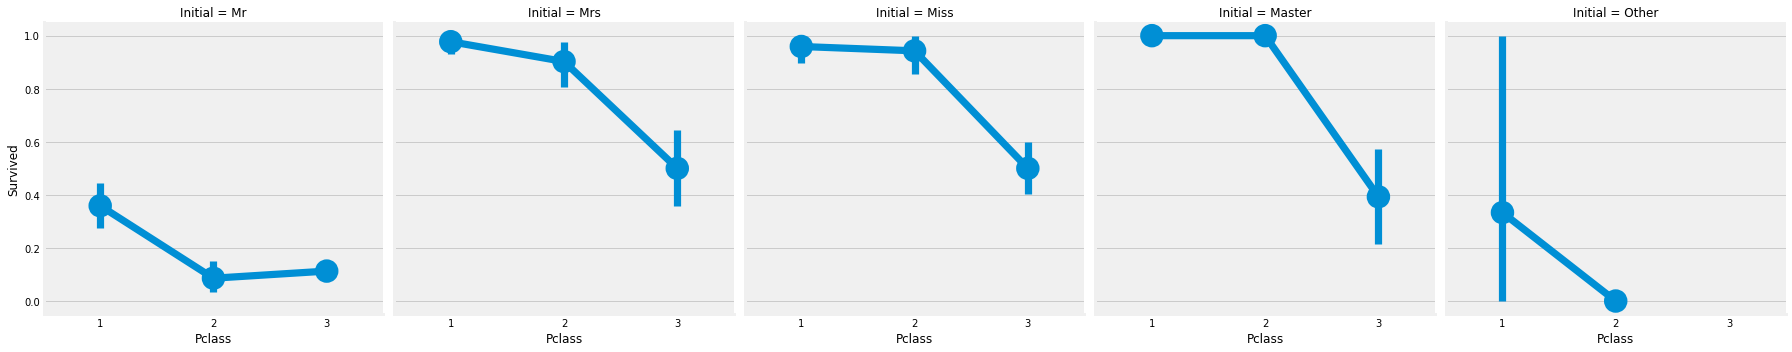

In [68]:
sns.catplot(x="Pclass", y="Survived", col="Initial", data=data, kind="point")
plt.show()

Таким образом, политика «Женщины и дети - прежде всего» действует независимо от класса.

## Embarked --> Categorical Value

In [75]:
pd.crosstab([data.Embarked,data.Pclass],
            [data.Sex,data.Survived],
            margins=True).style.background_gradient(cmap='summer_r')

### Шансы на выживание по порту отплытия

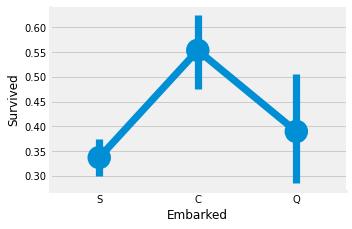

In [76]:
sns.catplot(x="Embarked", y="Survived", data=data, kind='point')
plt.show()

Шансы на выживание для порта C самые высокие - около 0,55, а самые низкие для S.

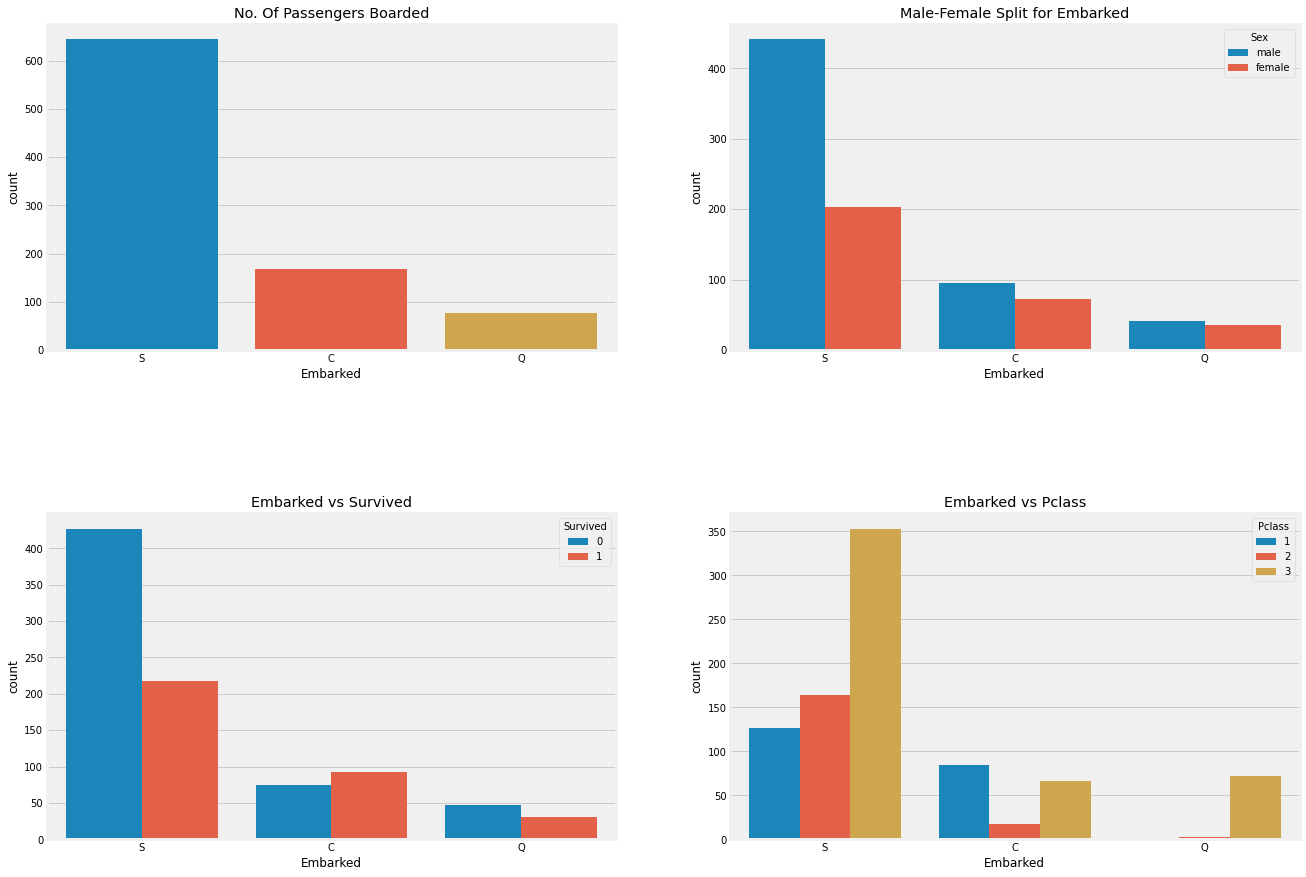

In [77]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

Наблюдения:

1) Максимальное количество пассажиров сели на борт в S. Большинство из них из Pclass3.

2) Пассажиры из C выглядят удачливыми, поскольку значительная часть из них выжила. Причиной этого может быть спасение всех пассажиров Pclass1 и Pclass2.

3) Embark S выглядит как порт откуда садилось большинство богатых людей. Тем не менее шансы на выживание здесь низкие, потому что многие пассажиры Pclass3 около 81% не выжили.

4) Порт Q имел почти 95% пассажиров из Pclass3.

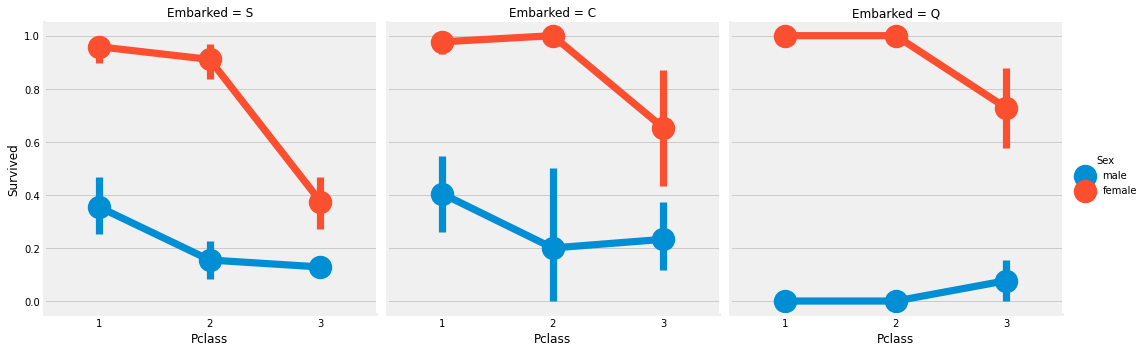

In [78]:
sns.catplot(x="Pclass", y="Survived", hue="Sex", col='Embarked', data=data, kind='point')
plt.show()

Наблюдения:

1) Шансы на выживание для женщин равны почти 1 для Pclass1 и Pclass2 независимо от порта.

2) Порт S выглядит очень неудачным для пассажиров Pclass3, так как выживаемость как мужчин, так и женщин очень низка (деньги имеют значение).

3) Порт Q выглядит самым неприятным для мужчин, поскольку почти все из них были из Pclass 3.